# 차원축소

## PCA(Principal Component Analysis / 주성분분석)
- 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주하여 데이터 변동성이 가장 큰 방향으로 축을 생성하고 새롭게 생성된 축으로 데이터를 투영하는 방식
- 여러 변수들의 변량을 주성분이라는 서로 상관관계가 높은 변수들의 선형결합으로 만들어 변수를 요약 및 축소하는 기법
- 다중공선성이 존재하는 경우 상관성이 적은 주성분으로 변수들을 축소
- 주성부눈석을 통해 차원을 축소한 후 군집분석을 수행하면 군집화 결과와 연산 속도 개선 가능

#### 주성분은 원 변수들 집합에서 k개의 관찰변수 가중치의 결합이다. 이 중에서 주성분1은 가장 많은 분산을 설명하는 k개의 가중치 결합이다.<br>


<center>$PC_{1} = \alpha_{1}X_{1} + \alpha_{2}X_{2} + ... + \alpha_{k}X_{k}$<center>

In [1]:
import pandas as pd

In [67]:
data = pd.read_csv('/Users/kisehyun/study_code/ADP/21th/csv/datasets/mtcars.csv')

In [68]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
scaled_df = scaler.fit_transform(data.iloc[:, 1:])

In [71]:
pca = PCA(n_components = 4)

In [72]:
pca.fit(scaled_df)

PCA(n_components=4)

In [73]:
comp = pca.transform(scaled_df)

In [74]:
pca_df = pd.DataFrame(comp, columns = ['주성분1', '주성분2', '주성분3', '주성분4'], index = data.iloc[:, 0])

In [75]:
pca_df.head()

,주성분1,주성분2,주성분3,주성분4
Unnamed: 0,,,,
Mazda RX4,0.657213,1.735446,-0.601199,0.115522
Mazda RX4 Wag,0.629396,1.550033,-0.382322,0.202307
Datsun 710,2.779397,-0.146457,-0.241238,-0.249139
Hornet 4 Drive,0.311771,-2.363019,-0.135759,-0.511862
Hornet Sportabout,-1.974489,-0.754402,-1.134402,0.075653


In [76]:
loadings = pd.DataFrame(pca.components_.T, columns = ['주성분1', '주성분2', '주성분3', '주성분4'], index = data.columns[1:])

In [77]:
loadings

,주성분1,주성분2,주성분3,주성분4
mpg,0.362531,0.016124,-0.225744,-0.022540
cyl,-0.373916,0.043744,-0.175311,-0.002592
disp,-0.368185,-0.049324,-0.061484,0.256608
hp,-0.330057,0.248784,0.140015,-0.067676
drat,0.294151,0.274694,0.161189,0.854829
wt,-0.346103,-0.143038,0.341819,0.245899
qsec,0.200456,-0.463375,0.403169,0.068077
vs,0.306511,-0.231647,0.428815,-0.214849
am,0.234943,0.429418,-0.205767,-0.030463
gear,0.206916,0.462349,0.289780,-0.264691


In [78]:
ax = pd.DataFrame(pca_df.std()).T

In [79]:
pca_summary = pd.concat([ax,pd.DataFrame(pca.explained_variance_ratio_).set_index(ax.columns).T])

In [80]:
pca_summary

,주성분1,주성분2,주성분3,주성분4
0,2.611814,1.654076,0.804630,0.527536
0,0.600764,0.240952,0.057018,0.024509


In [81]:
import numpy as np

In [82]:
proportion = pca.explained_variance_ratio_
s = 0
result = []
for i in range(len(proportion)) :
    s = s+ proportion[i]
    result.append(np.round(s,4))

In [83]:
pca_summary.loc[1] = result

In [84]:
pca_summary.index = ['표준편차', '변동량', '누적변동량']

In [85]:
pca_summary

,주성분1,주성분2,주성분3,주성분4
표준편차,2.611814,1.654076,0.804630,0.527536
변동량,0.600764,0.240952,0.057018,0.024509
누적변동량,0.600800,0.841700,0.898700,0.923200


주성분 1,2만으로 전체 변동의 84%를 설명할 수 있다.

In [86]:
per_var = np.round(pca.explained_variance_, decimals = 1)
labels = ['주성분' + str(x) for x in range(1,len(per_var) + 1)]

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

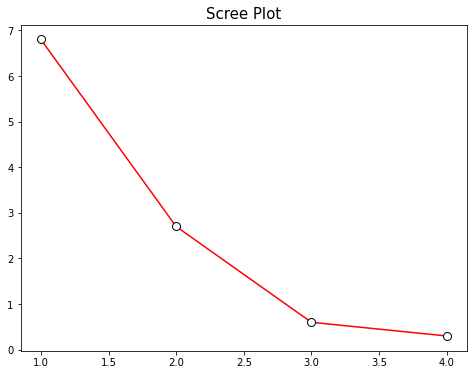

In [89]:
plt.figure(figsize = (8,6))
plt.title('Scree Plot',fontsize = 15)
plt.plot(range(1, 5), per_var,marker = 'o',markerfacecolor = 'w',markersize = 8,markeredgecolor='k',color = 'r')
plt.show()

팔꿈치 그림은 주성분이 3개일 때 팔꿈치 모양 존재

In [130]:
def biplot(score,coeff, labels=None, index = None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize = (12, 9))
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,head_width = 0.01)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], str(i))
        else:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], index[i])
    plt.title("PCA - Biplot",fontsize = 15)
    plt.xlabel("Comp.{}".format(1))
    plt.ylabel("Comp.{}".format(2))
    plt.grid()

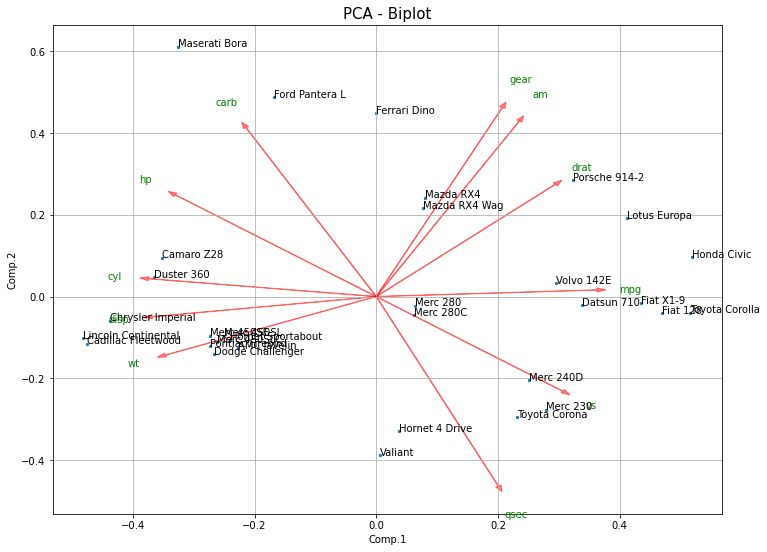

In [131]:
biplot(comp, np.transpose(pca.components_), labels = data.columns[1:], index = data.iloc[:,0])

화살표 길이가 길수록 원변수의 분산을 잘 설명하는 변수라고 할 수 있다.

화살표는 원변수와 PC의 상관계수를 뜻하며 PC와 평행할수록 해당 PC에 큰 영향
***
## LDA(Linear Discriminant Analysis / 선형 판별 분석)
- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.
- 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
- 클래스간 분산과 클래스 내부 분산의 비율을 최대화 하는 방식으로 차원을 축소한다.
- 즉, 클래스 간 분산은 크게 클래스 내부 분산은 최대한 작게 가져간다.

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

In [139]:
data = pd.DataFrame(load_iris().data, columns = load_iris().feature_names)
data['target'] = load_iris().target

In [140]:
scaled_df = scaler.fit_transform(data.iloc[:,:-1])

In [143]:
lda = LinearDiscriminantAnalysis(n_components = 2)

In [165]:
lda_iris = lda.fit_transform(scaled_df, data.target)

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [149]:
gb = GradientBoostingClassifier(random_state = 529)

In [151]:
score = cross_val_score(gb, data.iloc[:, :-1], data.target, scoring = 'accuracy', cv = 5)

In [153]:
score.mean()

0.9600000000000002

In [166]:
score = cross_val_score(gb, lda_iris, data.target, scoring = 'accuracy', cv = 5)

In [167]:
score.mean()

0.96

LDA로 차원을 2차원으로 축소한 후 train / validation을 진행했는데 성능상 별차이가 없는 것을 확인했다. -> 항상 이렇지는 않다.